In [84]:
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mat = scipy.io.loadmat('mill.mat')
mat_data = mat['mill']

# Read Data

In [85]:
mat = {k:v for k, v in mat.items() if k[0] != '_'}

# parsing arrays in arrays in mat file  
data = {}
for k,v in mat.items():
    arr = v[0]
    for i in range(len(arr)):
        sub_arr = v[0][i]
        lst= []
        for sub_index in range(len(sub_arr)):
            vals = sub_arr[sub_index]
            if len(vals) == 1:
                vals = vals[0][0]
            else:
                vals = vals[1500: 7000]
                vals = vals.reshape(vals.shape[0])
                vals = np.max(vals) - np.min(vals)
            lst.append(vals)
        data['row_{}'.format(i)] = lst
        
data_file = pd.DataFrame.from_dict(data, orient='index', columns=['case', 'run', 'VB', 'time', 'DOC', "feed", 
                                                                  "material", "smcAC", "smcDC", "vib_table", "vib_spindle",
                                                                  "AE_table",
                                                                  "AE_spindle"])
data_file.to_csv("mill.csv", index = False)
print("DONE")

DONE


In [86]:
data = pd.read_csv('mill.csv')
data['cut_no'] = [i for i in range(len(data))]
data.head(20)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,cut_no
0,1,1,0.00,2,1.50,0.5,1,7.910156,3.955078,1.772461,0.488281,0.365601,0.297241,0
1,1,2,NaN,4,1.50,0.5,1,7.792969,3.208008,1.711426,0.476074,0.291748,0.277100,1
2,1,3,NaN,6,1.50,0.5,1,7.912598,2.573242,1.555176,0.561523,0.330200,0.407104,2
3,1,4,0.11,7,1.50,0.5,1,8.242188,2.255859,1.525879,0.358887,0.303345,0.377197,3
4,1,5,NaN,11,1.50,0.5,1,9.118652,3.588867,1.242676,0.308838,0.258179,0.228882,4
5,1,6,0.20,15,1.50,0.5,1,9.467773,3.666992,0.634766,0.733643,0.274048,0.236816,5
6,1,7,0.24,19,1.50,0.5,1,9.653320,2.919922,1.408691,0.192871,0.229492,0.361328,6
7,1,8,0.29,22,1.50,0.5,1,9.990234,2.426758,0.695801,0.191650,0.293579,0.303955,7
8,1,9,0.28,26,1.50,0.5,1,9.997559,2.475586,1.235352,0.206299,0.280151,0.413208,8
9,1,10,0.29,29,1.50,0.5,1,10.712891,0.278320,0.686035,0.167236,0.303955,0.376587,9


### Convert label
if vb < 0.2 => healthy

0.2 <= vb < 0.7 degredation

vb >= 0.7 Failure

In [87]:
def convert_label(x):
    if x < 0.2:
        return 0
    elif 0.2 <= x < 0.7:
        return 1
    elif pd.isnull(x):
        pass
    else:
        return 2
data['label'] = data['VB'].apply(convert_label)
data[data['case'] == 1]

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,cut_no,label
0,1,1,0.00,2,1.5,0.5,1,7.910156,3.955078,1.772461,0.488281,0.365601,0.297241,0,0.0
1,1,2,NaN,4,1.5,0.5,1,7.792969,3.208008,1.711426,0.476074,0.291748,0.277100,1,NaN
2,1,3,NaN,6,1.5,0.5,1,7.912598,2.573242,1.555176,0.561523,0.330200,0.407104,2,NaN
3,1,4,0.11,7,1.5,0.5,1,8.242188,2.255859,1.525879,0.358887,0.303345,0.377197,3,0.0
4,1,5,NaN,11,1.5,0.5,1,9.118652,3.588867,1.242676,0.308838,0.258179,0.228882,4,NaN
5,1,6,0.20,15,1.5,0.5,1,9.467773,3.666992,0.634766,0.733643,0.274048,0.236816,5,1.0
6,1,7,0.24,19,1.5,0.5,1,9.653320,2.919922,1.408691,0.192871,0.229492,0.361328,6,1.0
7,1,8,0.29,22,1.5,0.5,1,9.990234,2.426758,0.695801,0.191650,0.293579,0.303955,7,1.0
8,1,9,0.28,26,1.5,0.5,1,9.997559,2.475586,1.235352,0.206299,0.280151,0.413208,8,1.0
9,1,10,0.29,29,1.5,0.5,1,10.712891,0.278320,0.686035,0.167236,0.303955,0.376587,9,1.0


# Visualization

### Normal data

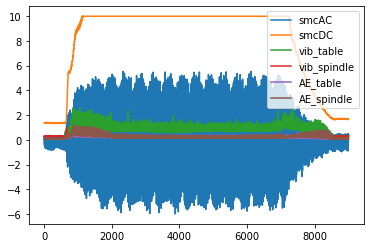

In [88]:
cut_no = 166
fig, ax = plt.subplots()

ax.plot(mat_data[0,cut_no]['smcAC'], label='smcAC')
ax.plot(mat_data[0,cut_no]['smcDC'], label='smcDC')
ax.plot(mat_data[0,cut_no]['vib_table'], label='vib_table')
ax.plot(mat_data[0,cut_no]['vib_spindle'], label='vib_spindle')
ax.plot(mat_data[0,cut_no]['AE_table'], label='AE_table')
ax.plot(mat_data[0,cut_no]['AE_spindle'], label='AE_spindle')

plt.legend()

### outlier

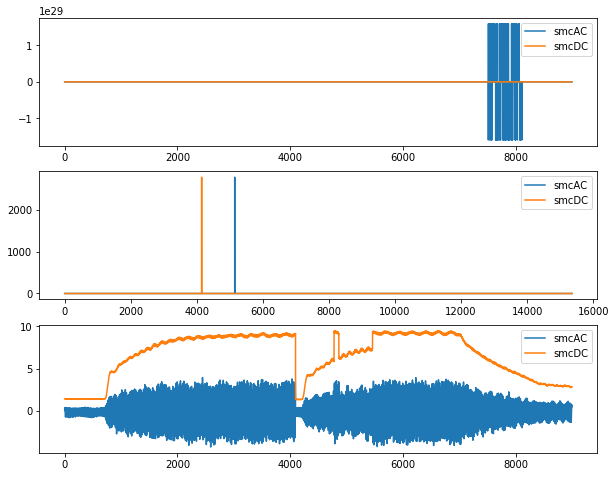

In [89]:
cut_no = 17
plt.figure(figsize = (10, 8))
plt.subplot(3,1,1)
plt.plot(mat_data[0, 17]['smcAC'], label='smcAC')
plt.plot(mat_data[0, 17]['smcDC'], label='smcDC')
plt.legend()
plt.subplot(3,1,2)
plt.plot(mat_data[0, 94]['smcAC'], label='smcAC')
plt.plot(mat_data[0, 94]['smcDC'], label='smcDC')
plt.legend()
plt.subplot(3,1,3)
plt.plot(mat_data[0, 105]['smcAC'], label='smcAC')
plt.plot(mat_data[0, 105]['smcDC'], label='smcDC')
plt.legend()

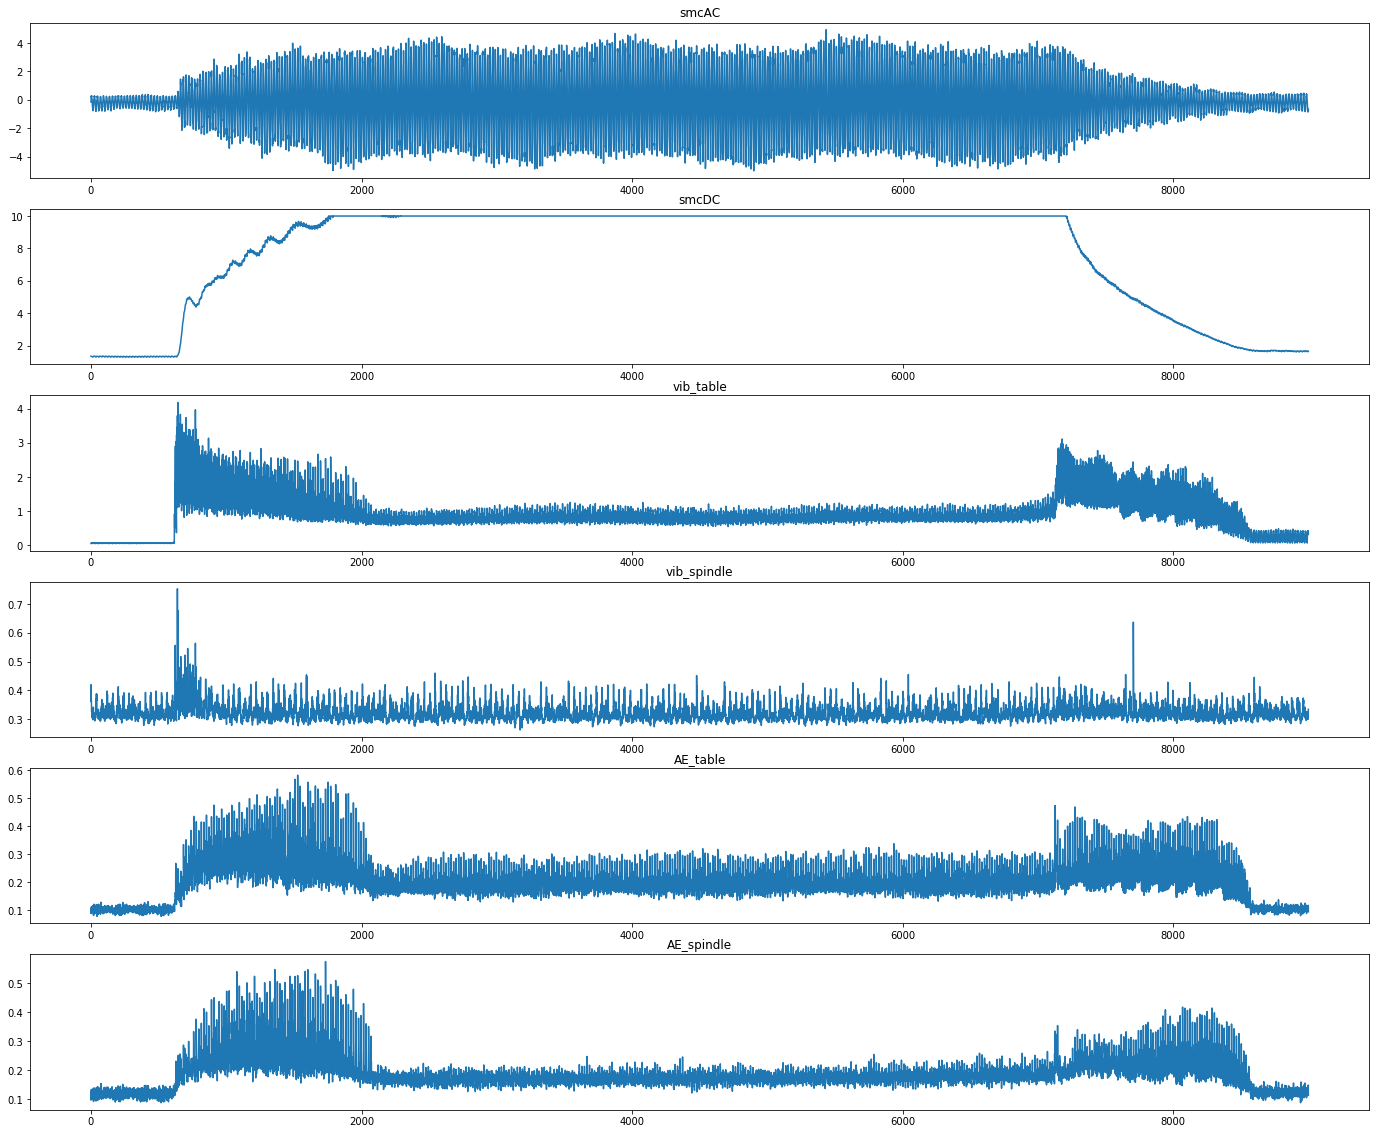

In [90]:
dis_col = data.columns[7:-2]
display = mat_data[0, 161]
plt.figure(figsize = (24, 20))
for idx, c in enumerate(dis_col):
    plt.subplot(6, 1, idx+1)
    plt.plot(display[c])
    plt.title(c, fontsize = 12)

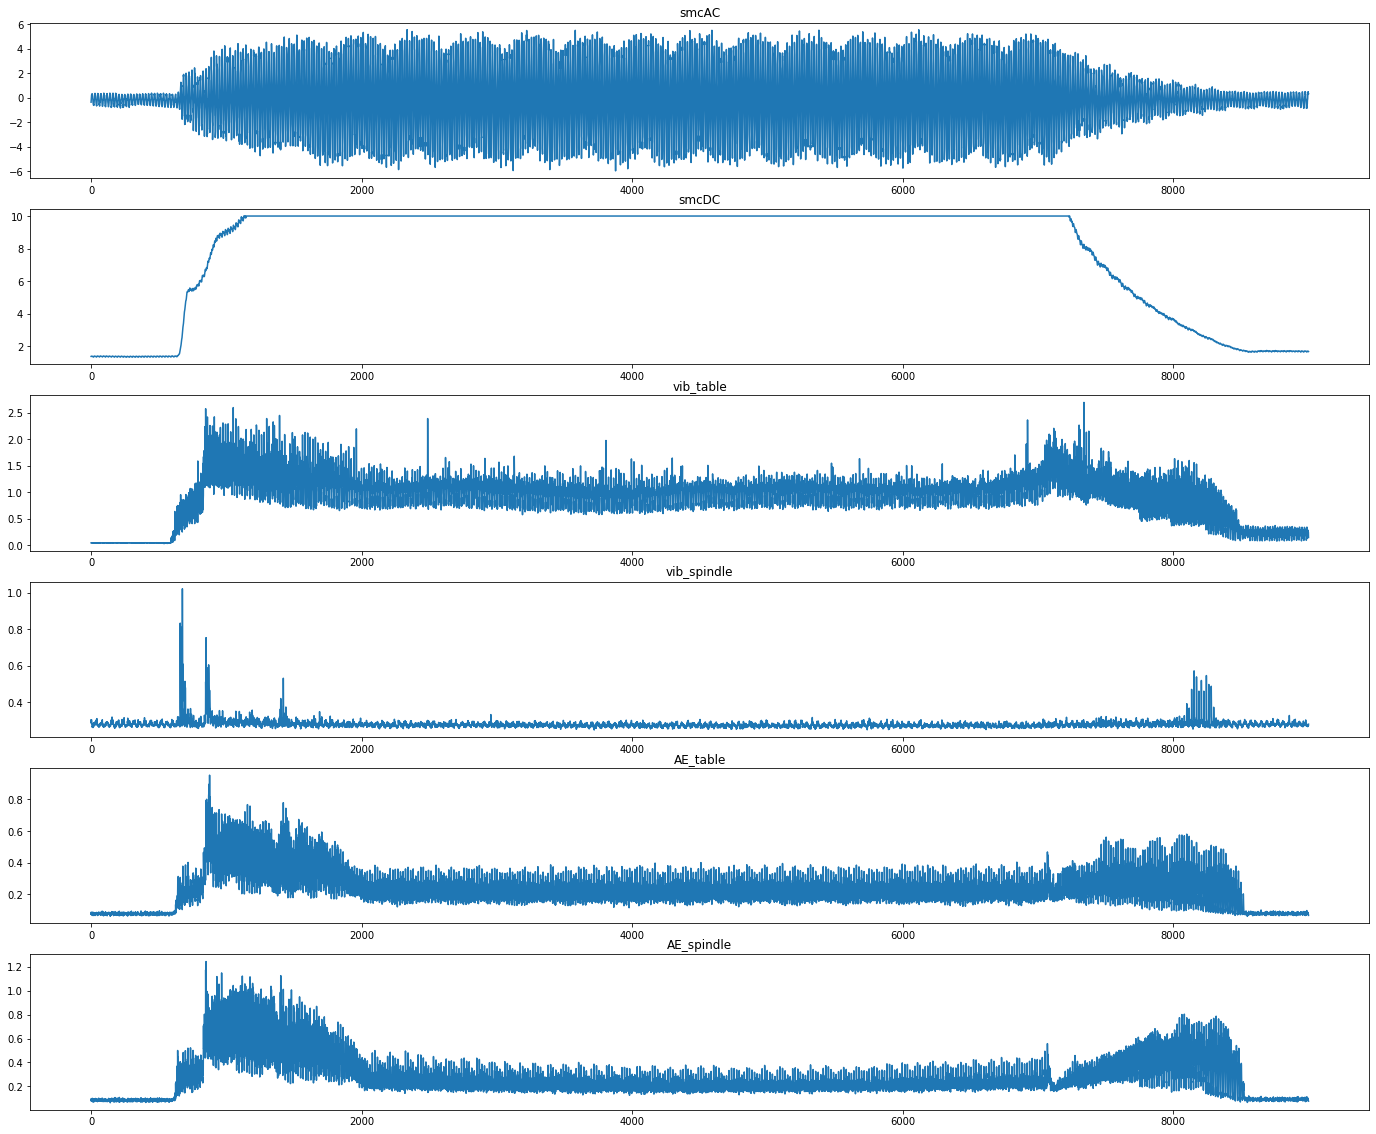

In [91]:
display = mat_data[0, 166]
plt.figure(figsize = (24, 20))
for idx, c in enumerate(dis_col):
    plt.subplot(6, 1, idx+1)
    plt.plot(display[c])
    plt.title(c, fontsize = 12)

In [92]:
# drop abnormal data
data.drop([17, 94], axis = 0, inplace = True)
data

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,cut_no,label
0,1,1,0.00,2,1.5,0.5,1,7.910156,3.955078,1.772461,0.488281,0.365601,0.297241,0,0.0
1,1,2,NaN,4,1.5,0.5,1,7.792969,3.208008,1.711426,0.476074,0.291748,0.277100,1,NaN
2,1,3,NaN,6,1.5,0.5,1,7.912598,2.573242,1.555176,0.561523,0.330200,0.407104,2,NaN
3,1,4,0.11,7,1.5,0.5,1,8.242188,2.255859,1.525879,0.358887,0.303345,0.377197,3,0.0
4,1,5,NaN,11,1.5,0.5,1,9.118652,3.588867,1.242676,0.308838,0.258179,0.228882,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,16,2,NaN,2,1.5,0.5,2,9.797363,0.214844,0.690918,0.169678,0.222168,0.154419,162,NaN
163,16,3,0.24,3,1.5,0.5,2,9.997559,0.273438,1.271973,0.111084,0.267944,0.189819,163,1.0
164,16,4,NaN,4,1.5,0.5,2,10.878906,0.000000,1.611328,0.086670,0.572510,0.432129,164,NaN
165,16,5,0.40,6,1.5,0.5,2,11.362305,0.000000,1.906738,0.087891,0.522461,0.537109,165,1.0


In [93]:
clean_data = data.dropna(axis = 0)
clean_data

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,cut_no,label
0,1,1,0.00,2,1.5,0.50,1,7.910156,3.955078,1.772461,0.488281,0.365601,0.297241,0,0.0
3,1,4,0.11,7,1.5,0.50,1,8.242188,2.255859,1.525879,0.358887,0.303345,0.377197,3,0.0
5,1,6,0.20,15,1.5,0.50,1,9.467773,3.666992,0.634766,0.733643,0.274048,0.236816,5,1.0
6,1,7,0.24,19,1.5,0.50,1,9.653320,2.919922,1.408691,0.192871,0.229492,0.361328,6,1.0
7,1,8,0.29,22,1.5,0.50,1,9.990234,2.426758,0.695801,0.191650,0.293579,0.303955,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,15,6,0.56,16,1.5,0.25,2,9.321289,3.481445,1.936035,0.888672,0.509033,0.405884,159,1.0
160,15,7,0.70,19,1.5,0.25,2,9.169922,2.875977,1.467285,0.262451,0.595703,0.735474,160,2.0
163,16,3,0.24,3,1.5,0.50,2,9.997559,0.273438,1.271973,0.111084,0.267944,0.189819,163,1.0
165,16,5,0.40,6,1.5,0.50,2,11.362305,0.000000,1.906738,0.087891,0.522461,0.537109,165,1.0


### Simple Classification


In [94]:
y = np.array(clean_data['label'])
reg_y = np.array(clean_data['VB'])
x = np.array(clean_data[clean_data.columns[[3, 7, 8, 9, 10, 11, 12]]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_test, Y_reg_train, Y_reg_test = train_test_split(x, reg_y, test_size=0.2, random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth = 4, random_state = 42)
RF.fit(X_train, Y_train)
RF.score(X_test, Y_test)

0.8620689655172413

In [97]:
from sklearn.svm import SVC
svm = SVC(gamma = 0.08)
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)

0.8620689655172413

#### Regression

In [98]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbr = xgb.XGBRegressor(n_estimators=500,seed=42)
xgbr.fit(X_train, Y_reg_train)
y_pred = xgbr.predict(X_test)
mean_squared_error(Y_reg_test, y_pred, squared = False)

0.20377125126803136